In [41]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image


img = cv2.imread('/Users/simenallum/Documents/msc_thesis/train_segmentation/test_images_seg/16.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [42]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [43]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [40]:
PIL_sure = Image.fromarray(np.uint8(markers)).convert('RGB')

PIL_sure.show()

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.load('/Users/simenallum/Downloads/SWED_sample/train/images/S2A_MSIL2A_20170409T105651_N0204_R094_T30UYC_20170409T110529_image_0_0.npy')

np.unique(img[:,:,[2,3,4]])

array([   1,    2,    3, ..., 4035, 4328, 4549], dtype=int16)

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# img_all = np.load('/Users/simenallum/Downloads/Sea-land_segmentation_dataset/npyfiles/test/test1/test_image_arr.npy')
img_all = np.load('/Users/simenallum/Downloads/Sea-land_segmentation_dataset/npyfiles/test/test2/test_image_arr.npy')
mask_all = np.load('/Users/simenallum/Downloads/Sea-land_segmentation_dataset/npyfiles/test/test2/test_mask_arr.npy')

print(img_all.shape)
print(mask_all.shape)


(1, 1024, 1024, 4)
(1, 1024, 1024, 1)


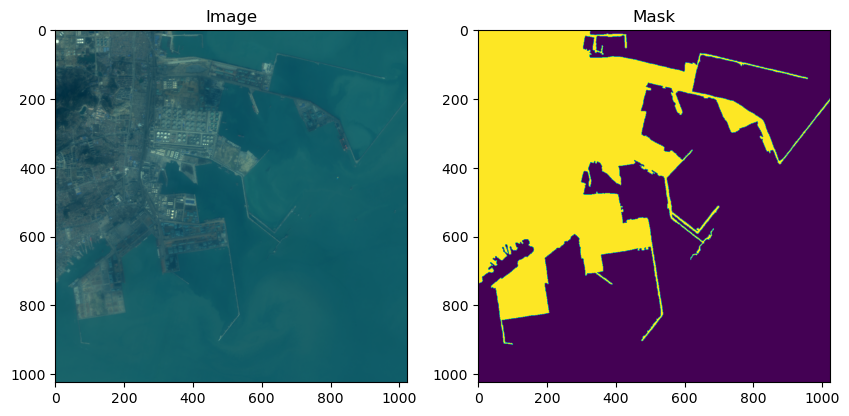

In [282]:
import random

# Set the upper limit of the random number range
upper_limit = img_all.shape[0]-1

# Generate a random number between 0 and upper_limit
img_num = random.randint(0, upper_limit)

red_band = img_all[img_num,:,:,2]
green_band = img_all[img_num,:,:,1]
blue_band = img_all[img_num,:,:,0]

# Stack the three bands into a single RGB image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

rgb_image = rgb_image.astype('float32')

scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Display the original and brighter images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(brighter_image)
ax[0].set_title('Image')
ax[1].imshow(mask_all[img_num,:,:,:])
ax[1].set_title('Mask')
plt.show()

# SWED dataset

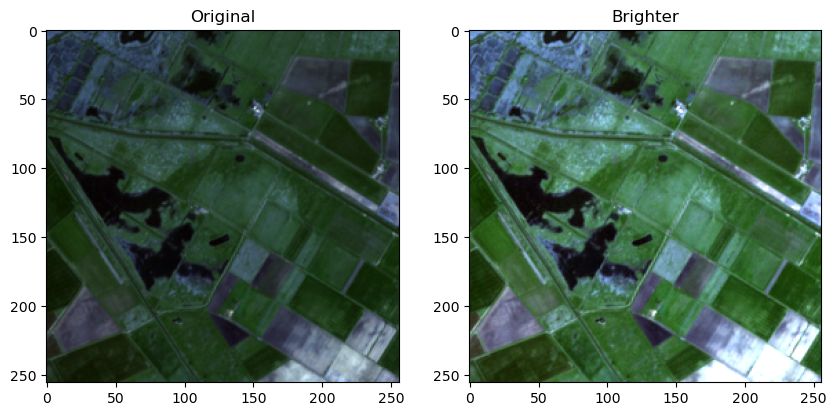

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageEnhance

# Load the image data into a NumPy array
img_array = np.load('/Users/simenallum/Downloads/SWED_sample/train/images/S2A_MSIL2A_20170409T105651_N0204_R094_T30UYC_20170409T110529_image_0_9.npy')

# Extract the red, green, and blue bands from the image array
red_band = img_array[:,:,1]
green_band = img_array[:,:,2]
blue_band = img_array[:,:,3]

# Stack the three bands into a single RGB image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Convert the data type of the RGB image array to uint8
rgb_image = rgb_image.astype('float32')
scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Assuming 'image' is the PIL Image object of the original image
image = np.squeeze(scaled_image)

# Next, convert the data type to uint8 and scale the values to the range 0-255
image = (image * 255).astype(np.uint8)

# Finally, create the PIL Image object from the NumPy array
pil_image = Image.fromarray(image)

enhancer = PIL.ImageEnhance.Brightness(pil_image)
brighter_image = enhancer.enhance(1.8)

# Display the original and brighter images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(brighter_image)
ax[1].set_title('Brighter')
plt.show()

(256, 256, 1)


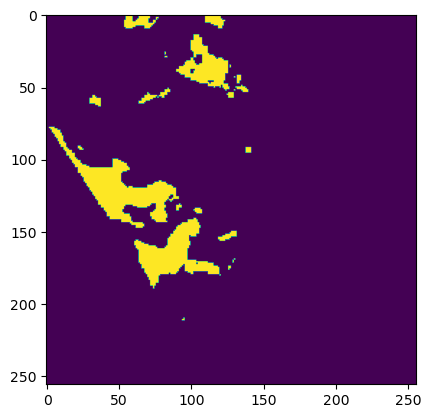

In [218]:
img_array = np.load('/Users/simenallum/Downloads/SWED_sample/train/labels/S2A_MSIL2A_20170409T105651_N0204_R094_T30UYC_20170409T110529_chip_0_9.npy')

print(img_array.T.shape)

plt.imshow(img_array.transpose((1, 2, 0)))
plt.show()